### Climate Analysis and Exploration

In [84]:
# Import our dependencies
import pandas as pd
import os
from pathlib import Path
import csv
import matplotlib.pyplot as plt
import numpy as np

In [85]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.sql import label
from sqlalchemy import func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import pandas as pd
from sqlalchemy import Column, Integer, String, Numeric, Text, Float,Table,ForeignKey
from flask import jsonify

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib

from datetime import datetime,timedelta

In [86]:
# Use a Session to test the Measurement class
engine = create_engine("sqlite:///hawaii.sqlite")

In [87]:
# Declare a Base using `automap_base()`
Base = automap_base()

Base.prepare(engine, reflect=True)
Base.classes.keys()

Measurement = Base.classes.measurement
Station = Base.classes.station

In [88]:
# create a session
session = Session(engine)
my_table = Table('Measurement', Base.metadata,
   Column("station", String, ForeignKey("Station.station")),
   autoload=True,autoload_with=engine)

In [89]:
#checking data in the measurement table
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70),
 (6, 'USC00519397', '2010-01-08', 0.0, 64),
 (7, 'USC00519397', '2010-01-09', 0.0, 68),
 (8, 'USC00519397', '2010-01-10', 0.0, 73),
 (9, 'USC00519397', '2010-01-11', 0.01, 64),
 (10, 'USC00519397', '2010-01-12', 0.0, 61)]

In [90]:
#checking data in the station table
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999995, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [91]:
# Start a session to query the database
session = Session(engine)

In [92]:
engine.execute("select * from measurement limit 5").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70)]

In [93]:
start_date = '2010-01-01'

In [94]:
end_date = '2011-01-01'

In [95]:
# Query measurements table and save the query into results
results = engine.execute("select * from measurement limit 5").fetchall()
current_time = datetime.now()
past_year = current_time - timedelta(days=365)
measurements_year = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > past_year).all()

### Precipitation Analysis

In [96]:
def precipitation_data():
   #Get date for last year
   current_time = datetime.now()
   past_year = current_time - timedelta(days=365)
   measurements_year = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > past_year).all()
   
   #created dictionary to get the data
   measure_records = []
   for measure in measurements_year:
       measure_records.append(measure._asdict())
   
   #dictionary to dataframe
   measurements_df = pd.DataFrame.from_records(measure_records)
   measurements_df = measurements_df.set_index('date')

   return measurements_df



In [97]:
prec_df=precipitation_data()
prec_df.head()


,prcp
date,
2017-02-08,0.00
2017-02-09,0.00
2017-02-10,0.00
2017-02-11,0.31
2017-02-12,2.62


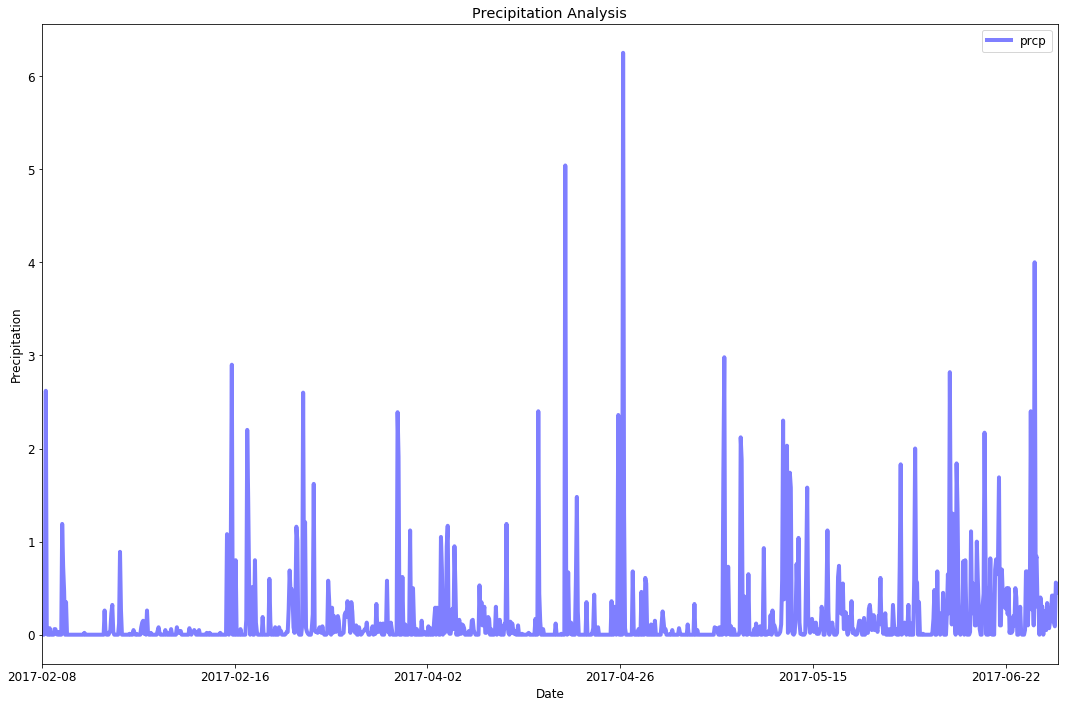

In [98]:
prec_df.plot(kind="line" , linewidth = 4,  color='b',alpha=0.5,figsize=(15,10))
plt.title("Precipitation Analysis")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.tight_layout()

plt.show()

### Station Analysis

In [99]:
#Design a query to calculate the total number of stations.
engine.execute("select * from station").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999995, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [100]:
#Creating the query to get active stations
active_stations = session.query(Station.name,Station.station,label('number_of_obs',func.count(Measurement.id))).\
                   filter(Measurement.station == Station.station).group_by(Station.name,Station.station).order_by(func.count(Measurement.id).desc())

In [101]:
#Design a query to find the most active stations.
#List the stations and observation counts in descending order

def station_data():
   active_stations = session.query(Station.name,Station.station,label('number_of_obs',func.count(Measurement.id))).\
                   filter(Measurement.station == Station.station).group_by(Station.name,Station.station).order_by(func.count(Measurement.id).desc())
   #created dictionary to get the data
   measure_records = []
   for measure in active_stations:
       measure_records.append(measure._asdict())
   
   #dictionary to dataframe
   measurements_df = pd.DataFrame.from_records(measure_records)

   return measurements_df

In [102]:
station_df=station_data()
station_df.head()

,name,number_of_obs,station
0,"WAIHEE 837.5, HI US",2772,USC00519281
1,"KANEOHE 838.1, HI US",2696,USC00513117
2,"WAIKIKI 717.2, HI US",2685,USC00519397
3,"WAIMANALO EXPERIMENTAL FARM, HI US",2572,USC00519523
4,"MANOA LYON ARBO 785.2, HI US",2484,USC00516128


In [103]:
#Which station has the highest number of observations?
station_id = station_df.iloc[:1]['station'][0]
print("Station with highest number of observations  is : " ,station_id)

Station with highest number of observations  is :  USC00519281


In [104]:
def temp_data():
   #Get date for last year
   current_time = datetime.now()
   past_year = current_time - timedelta(days=365)
   measurements_year = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date > past_year).filter(Measurement.station ==station_id).all()
   
   #created dictionary to get the data
   measure_records = []
   for measure in measurements_year:
       measure_records.append(measure._asdict())
   
   #dictionary to dataframe
   measurements_df = pd.DataFrame.from_records(measure_records)
   measurements_df = measurements_df.set_index('date')

   return measurements_df

In [105]:
tobs_df= temp_data()
tobs_df.head()

,tobs
date,
2017-02-08,59
2017-02-09,59
2017-02-10,62
2017-02-11,68
2017-02-12,70


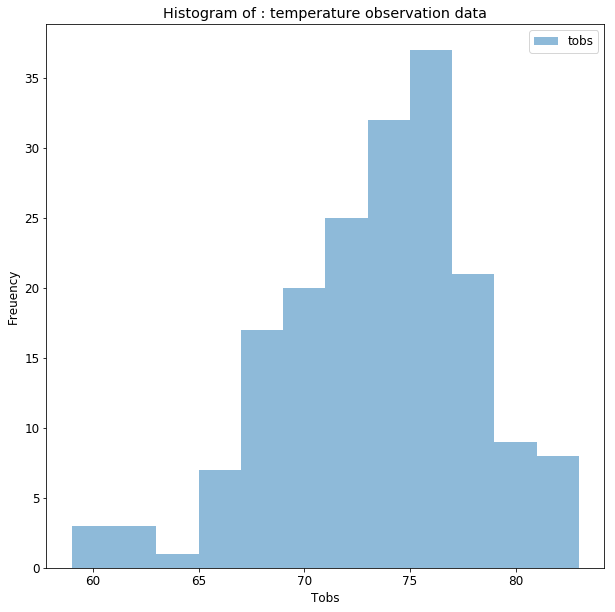

In [106]:
#draw histogram for temperature
tobs_df.plot.hist(alpha=0.5,bins=12 ,figsize=(10,10))

plt.xlabel('Tobs')
plt.ylabel('Freuency')
plt.title('Histogram of : temperature observation data')
plt.show()

### Temperature Analysis

In [107]:
 #Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.
#startdate = "2016-01-02"
#enddate = "2017-01-02"

def calc_temps(startdate,enddate):
   temperature_vacation = session.query(label('max_temp',func.max(Measurement.tobs)),\
                                    label('min_temp',func.min(Measurement.tobs)),\
                                    label('avg_temp',func.avg(Measurement.tobs))).\
                   filter(Measurement.date >= startdate).\
                   filter(Measurement.date <= enddate )

   Max_temp = temperature_vacation[0].max_temp
   Min_temp = temperature_vacation[0].min_temp
   Avg_temp = temperature_vacation[0].avg_temp

   print("Tempture for date range:",Max_temp ,Min_temp,Avg_temp)
   print("Last year tempature for same date range :Max Temp,MIN temp,Avg temp :", Max_temp,Min_temp,Avg_temp)
   
   yerror = Max_temp - Min_temp
   
   barvalue = [Avg_temp]
   xvals = range(len(barvalue))
   matplotlib.rcParams.update({'font.size': 12})
   
   fig,ax = plt.subplots(figsize=(5,8))
   ax.bar(xvals, barvalue, yerr=yerror, color='g',alpha=0.6)
   ax.set_xticks([1])
   plt.xlabel("Vacation time period")
   plt.ylabel("Temperature")
   plt.title("Trip average temperature")
   plt.tight_layout()
   plt.savefig("Tripavg.png")
   
   plt.show() 

please enter the start date in the format `%Y-%m-%d` :2016-01-02
Tempture for date range: 84 56 74.09553831231814
Last year tempature for same date range :Max Temp,MIN temp,Avg temp : 84 56 74.09553831231814


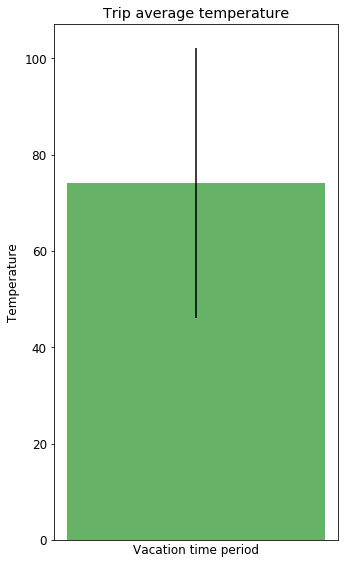

In [114]:
#asking the user to enter the startdate and calculating the end date
import datetime

sdate = input("please enter the start date in the format `%Y-%m-%d` :")
startdate=datetime.datetime.strptime(sdate, "%Y-%m-%d")
enddate = startdate + datetime.timedelta(days=365)
calc_temps(startdate,enddate)